For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

**Import packages**

Import relevant Python packages. Use train_test_split, LogisticRegression, and various imports from sklearn.metrics to build, visualize, and evalute the model.

In [2]:
### Your code goes here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


**Load the dataset**
The dataset Invistico_Airline.csv is loaded. The resulting pandas DataFrame is saved as a variable named df_original. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_original = pd.read_csv("Invistico_Airline.csv")

**Output the first 10 rows**
Output the first 10 rows of data.

In [5]:
#  first 10 rows

display(df_original.head(10))

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


**Explore the data**

Check the data type of each column. Note that logistic regression models expect numeric data.

In [6]:
# Check datatypes

print(df_original.dtypes)

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

**Check the number of satisfied customers in the dataset**

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


Text(0, 0.5, 'Number of Customers')

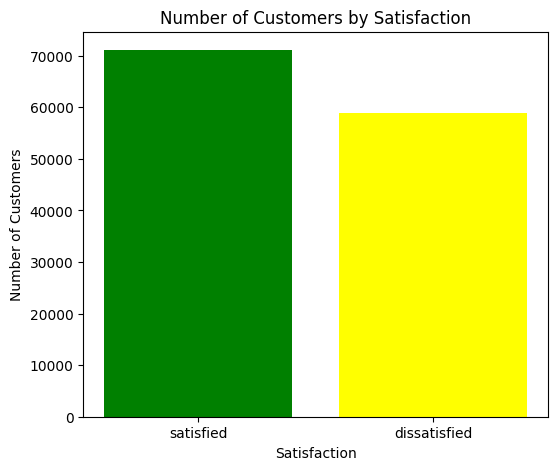

In [10]:
#  Check counts in satisfaction column (if present)
satisfaction_counts = df_original['satisfaction'].value_counts()
print(satisfaction_counts)

# Bar chart
plt.figure(figsize=(6,5))
colors = ['green', 'yellow']  # one color for each category
plt.bar(satisfaction_counts.index, satisfaction_counts.values, color=colors)
plt.title("Number of Customers by Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Number of Customers")


**Check for missing values**

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [7]:
#  Check for missing values
print("\n=== Missing values per column ===")
print(df_original.isnull().sum())


=== Missing values per column ===
satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


**Drop the rows with missing values**

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named df_subset.

In [8]:
#  Drop rows with missing values
df_subset = df_original.dropna().copy()
print(f"\nAfter dropping rows with missing values: shape = {df_subset.shape} (was {df_original.shape})")


After dropping rows with missing values: shape = (129487, 22) (was (129880, 22))


**Prepare the data**



Make the Inflight entertainment column "of type float."

In [9]:
#  Convert 'Inflight entertainment' to float if column exists (robust search)
ent_col_candidates = [c for c in df_subset.columns if 'inflight' in c.lower() and 'entertain' in c.lower()]
if ent_col_candidates:
    ent_col = ent_col_candidates[0]
    print(f"\nConverting '{ent_col}' to numeric.")
    df_subset[ent_col] = pd.to_numeric(df_subset[ent_col], errors='coerce')
    if df_subset[ent_col].isnull().any():
        df_subset[ent_col].fillna(df_subset[ent_col].median(), inplace=True)
else:
    print("\nCould not auto-find an 'Inflight entertainment' column. If present with another name, change the code accordingly.")
    ent_col = None


Converting 'Inflight entertainment' to numeric.


**Convert the categorical column satisfaction into numeric**

Convert the categorical column satisfaction into numeric through one-hot encoding.

In [ ]:
#  One-hot encode satisfaction robustly and choose the 'satisfied' column as target
if 'satisfaction' not in df_subset.columns:
    raise KeyError("No 'satisfaction' column in dataset - can't proceed.")

dummies = pd.get_dummies(df_subset['satisfaction'], prefix='satisfaction')
# try to find the column containing 'satisfied'
satisfied_cols = [c for c in dummies.columns if 'satisf' in c.lower() and 'satisfied' in c.lower()]
if not satisfied_cols:
    satisfied_cols = [c for c in dummies.columns if 'satisf' in c.lower()]
if satisfied_cols:
    target_col = satisfied_cols[0]
else:
    # fallback to first dummy if nothing fits
    target_col = dummies.columns[0]

df_subset = pd.concat([df_subset, dummies], axis=1)
print(f"\nTarget column (satisfaction numeric) chosen: {target_col}")


Target column (satisfaction numeric) chosen: satisfaction_dissatisfied


**Output the first 10 rows of df_subset**

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of df_subset.

In [ ]:
#  Show first 10 rows of df_subset
print("\n=== First 10 rows of df_subset ===")
display(df_subset.head(10))


=== First 10 rows of df_subset ===


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,0,3,5,3,2,0,0.0,False,True
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,4,4,4,2,3,2,310,305.0,False,True
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,3,3,4,4,4,2,0,0.0,False,True
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,0,1,4,1,3,0,0.0,False,True
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,0,2,4,2,5,0,0.0,False,True
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,5,4,5,5,4,2,0,0.0,False,True
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,0,5,5,5,3,17,15.0,False,True
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,3,3,4,5,4,2,0,0.0,False,True
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,4,0,1,5,4,4,0,0.0,False,True
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,4,5,3,4,2,30,26.0,False,True


**Create the training and testing data**

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [ ]:
#  Select features (use sensible defaults and pick whichever exist)
candidate_features = [
    'Class', 'class', 'Flight Distance', 'FlightDistance', 'Flight distance',
    'Inflight entertainment', 'Inflight Entertainment', 'Inflight wifi service',
    'Age', 'Customer Type', 'Type of Travel', 'Gender',
    'Seat comfort', 'Food and drink', 'Gate location', 'Online boarding',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Collect which of the candidate features exist in the DataFrame (case-insensitive)
existing_features = []
cols_lower = {c.lower(): c for c in df_subset.columns}
for cand in candidate_features:
    if cand in df_subset.columns:
        existing_features.append(cand)
    elif cand.lower() in cols_lower:
        existing_features.append(cols_lower[cand.lower()])

# Fallback: use some numeric columns if none of the candidates exist
if not existing_features:
    numeric_cols = df_subset.select_dtypes(include=[np.number]).columns.tolist()
    # remove the satisfaction dummy columns
    numeric_cols = [c for c in numeric_cols if not c.startswith('satisfaction_')]
    existing_features = numeric_cols[:6]  # take up to 6 numeric features
    print("\nNo candidate features found; falling back to numeric columns:", existing_features)
else:
    print("\nUsing these features:", existing_features)

# Prepare X and y
y = df_subset[target_col]
X_raw = df_subset[existing_features].copy()

# One-hot encode categorical columns in X
cat_cols = X_raw.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    print("\nCategorical columns in X detected:", cat_cols)
    X = pd.get_dummies(X_raw, columns=cat_cols, drop_first=True)
else:
    X = X_raw.copy()

print("\nFinal feature columns (first 20):", X.columns.tolist()[:20])

# 11) Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
print(f"\nTrain/test shapes: X_train={X_train.shape}, X_test={X_test.shape}")



Using these features: ['Class', 'Class', 'Flight Distance', 'Flight Distance', 'Inflight entertainment', 'Inflight entertainment', 'Inflight wifi service', 'Age', 'Customer Type', 'Type of Travel', 'Seat comfort', 'Food and drink', 'Gate location', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Categorical columns in X detected: ['Class', 'Class', 'Customer Type', 'Type of Travel']

Final feature columns (first 20): ['Flight Distance', 'Flight Distance', 'Inflight entertainment', 'Inflight entertainment', 'Inflight wifi service', 'Age', 'Seat comfort', 'Food and drink', 'Gate location', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Class_Eco', 'Class_Eco Plus', 'Class_Eco', 'Class_Eco Plus', 'Class_Eco', 'Class_Eco Plus', 'Class_Eco', 'Class_Eco Plus']

Train/test shapes: X_train=(90640, 22), X_test=(38847, 22)


**Fit a LogisticRegression model to the data**

Build a logistic regression model and fit the model to the training data.

In [ ]:

#  Fit LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\delta computer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Obtain parameter estimates**

Make sure you output the two parameters from your model.

In [ ]:
#  Output coefficients and intercept
coef = model.coef_.ravel()
intercept = model.intercept_[0]
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': coef}).sort_values(by='coefficient', key=abs, ascending=False)
print("\nTop coefficients (absolute value):")
display(coef_df.head(20))
print("Intercept:", intercept)


Top coefficients (absolute value):


,feature,coefficient
20,Customer Type_disloyal Customer,1.789974
6,Seat comfort,-0.399082
13,Class_Eco Plus,0.362628
15,Class_Eco Plus,0.362628
19,Class_Eco Plus,0.362628
17,Class_Eco Plus,0.362628
9,Online boarding,-0.354259
3,Inflight entertainment,-0.337112
2,Inflight entertainment,-0.337112
12,Class_Eco,0.310305


Intercept: 1.0365192409534902


**Predict the outcome for the test dataset**

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the predict function to get the predicted labels from the model. Save these predictions as a variable called y_pred.

In [ ]:
#  Predictions and probabilities on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print("\nFirst 50 predictions (y_pred):")
print(y_pred[:50])
print("\nFirst 5 predict_proba rows:")
print(y_proba[:5])


First 50 predictions (y_pred):
[False False False False False False False  True False False False False
  True False False  True  True  True  True False False  True False  True
 False False  True False  True False False False False False  True False
 False False False  True  True  True False False  True  True False False
  True  True]

First 5 predict_proba rows:
[[0.6489157  0.3510843 ]
 [0.95800043 0.04199957]
 [0.93949008 0.06050992]
 [0.62246346 0.37753654]
 [0.87117142 0.12882858]]


**Print out y_pred** 

In order to examine the predictions, print out y_pred.

In [30]:
y_pred = model.predict(X_test)
print("Q14: Predictions made for X_test:")
print(f"y_pred (first 50 values): {y_pred[:50]}")
print(f"Total predictions: {len(y_pred)}")

Q14: Predictions made for X_test:
y_pred (first 50 values): [False False False False False False False  True False False False False
  True False False  True  True  True  True False False  True False  True
 False False  True False  True False False False False False  True False
 False False False  True  True  True False False  True  True False False
  True  True]
Total predictions: 38847


Use the predict_proba and predict functions on X_test¶

In [22]:
y_pred_proba = model.predict_proba(X_test)
print("Q15: Prediction probabilities:")
print("Format: [P(class=0), P(class=1)]")
print(f"First 10 probability predictions:\n{y_pred_proba[:10]}")

Q15: Prediction probabilities:
Format: [P(class=0), P(class=1)]
First 10 probability predictions:
[[0.6489157  0.3510843 ]
 [0.95800043 0.04199957]
 [0.93949008 0.06050992]
 [0.62246346 0.37753654]
 [0.87117142 0.12882858]
 [0.89118287 0.10881713]
 [0.50082287 0.49917713]
 [0.03943313 0.96056687]
 [0.88116771 0.11883229]
 [0.82199342 0.17800658]]


***Analyze the results***

Print out the model's accuracy, precision, recall, and F1 score.

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("_________________________")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Evaluation Metrics:
_________________________
Accuracy: 0.7968
Precision: 0.7918
Recall: 0.7475
F1 Score: 0.7690


**Produce a confusion matrix**

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

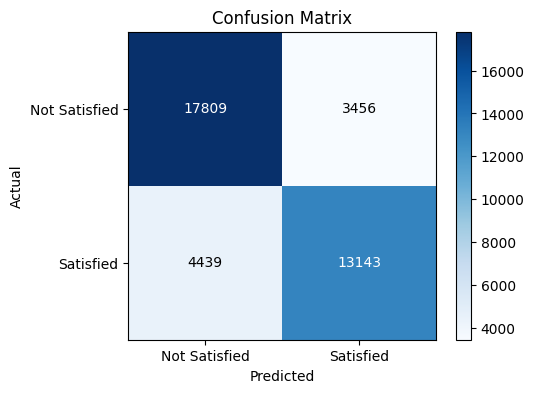

In [43]:



# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Labels and annotations
classes = ['Not Satisfied', 'Satisfied']
plt.xticks([0,1], classes)
plt.yticks([0,1], classes)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='white' if cm[i,j]>cm.max()/2 else 'black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
